In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
# Import training and validation sets 
df = pd.read_csv("data/sales_train.csv", low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [6]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

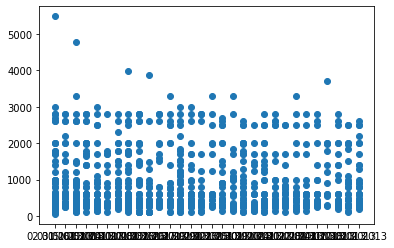

In [7]:
fig, ax = plt.subplots()
ax.scatter(df["date"][:1000], df["item_price"][:1000])

In [8]:
df.date

0          02.01.2013
1          03.01.2013
2          05.01.2013
3          06.01.2013
4          15.01.2013
              ...    
2935844    10.10.2015
2935845    09.10.2015
2935846    14.10.2015
2935847    22.10.2015
2935848    03.10.2015
Name: date, Length: 2935849, dtype: object

<AxesSubplot:ylabel='Frequency'>

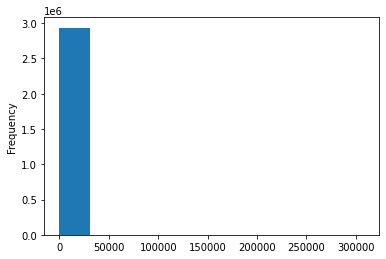

In [9]:
df.item_price.plot.hist()

### Parsed dated

When we work with time data, enrich time component as much as possible. 

In [10]:
# Import data again but this time parse dates
df = pd.read_csv("data/sales_train.csv", low_memory=False, parse_dates = ["date"])

In [11]:
df.date.dtype

dtype('<M8[ns]')

In [12]:
df.date[:1000]

0     2013-02-01
1     2013-03-01
2     2013-05-01
3     2013-06-01
4     2013-01-15
         ...    
995   2013-01-23
996   2013-01-27
997   2013-01-31
998   2013-01-27
999   2013-03-01
Name: date, Length: 1000, dtype: datetime64[ns]

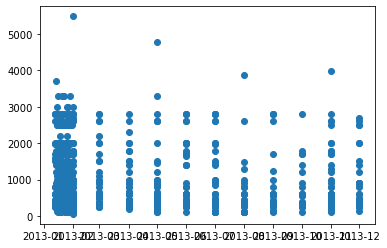

In [13]:
fig, ax = plt.subplots()
ax.scatter(df["date"][:1000], df["item_price"][:1000])

In [14]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [15]:
df.head().T

,0,1,2,3,4
date,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-01-15 00:00:00
date_block_num,0,0,0,0,0
shop_id,59,25,25,25,25
item_id,22154,2552,2552,2554,2555
item_price,999.0,899.0,899.0,1709.05,1099.0
item_cnt_day,1.0,1.0,-1.0,1.0,1.0


In [16]:
df.date.head(20)

0    2013-02-01
1    2013-03-01
2    2013-05-01
3    2013-06-01
4    2013-01-15
5    2013-10-01
6    2013-02-01
7    2013-04-01
8    2013-11-01
9    2013-03-01
10   2013-03-01
11   2013-05-01
12   2013-07-01
13   2013-08-01
14   2013-10-01
15   2013-11-01
16   2013-01-13
17   2013-01-16
18   2013-01-26
19   2013-01-27
Name: date, dtype: datetime64[ns]

### When sorting the date, good idea to sort it in order

In [17]:
# Sort DataFrame in date order
df.sort_values(by=["date"], inplace = True, ascending = True)
df.date.head(20)

109593   2013-01-01
85162    2013-01-01
18128    2013-01-01
112216   2013-01-01
85141    2013-01-01
47143    2013-01-01
85130    2013-01-01
85129    2013-01-01
85124    2013-01-01
85115    2013-01-01
107443   2013-01-01
18195    2013-01-01
47150    2013-01-01
18204    2013-01-01
47156    2013-01-01
18213    2013-01-01
85095    2013-01-01
85093    2013-01-01
47171    2013-01-01
47200    2013-01-01
Name: date, dtype: datetime64[ns]

### Make a copy of the original dataframe, so if something goes wrong we still have it 

In [7]:
#Make a copy
df_tmp = df.copy()

### Add datetime parameter for saledate features 

In [19]:
df_tmp["saleYear"] = df_tmp.date.dt.year
df_tmp["saleMonth"] = df_tmp.date.dt.month
df_tmp["saleDay"] = df_tmp.date.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.date.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.date.dt.dayofyear

In [20]:
df_tmp.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
109593,2013-01-01,0,46,18616,349.0,1.0,2013,1,1,1,1
85162,2013-01-01,0,54,11854,199.0,1.0,2013,1,1,1,1
18128,2013-01-01,0,28,4906,1799.0,1.0,2013,1,1,1,1
112216,2013-01-01,0,42,2931,99.0,1.0,2013,1,1,1,1
85141,2013-01-01,0,54,11604,349.0,1.0,2013,1,1,1,1


In [21]:
# Now we've enriched our DataFrame with date timew features, we can remove saledate
df_tmp.drop("date", axis=1, inplace=True)

### Moddeling the data 

In [22]:
%%time
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(df_tmp.drop("item_price", axis=1), df_tmp["item_price"])

Wall time: 20min 14s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [23]:
model.score(df_tmp.drop("item_price", axis=1), df_tmp.item_price)


0.9969353694636752

### Splitting data into train and valid test sets

In [24]:
df_tmp.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
109593,0,46,18616,349.0,1.0,2013,1,1,1,1
85162,0,54,11854,199.0,1.0,2013,1,1,1,1
18128,0,28,4906,1799.0,1.0,2013,1,1,1,1
112216,0,42,2931,99.0,1.0,2013,1,1,1,1
85141,0,54,11604,349.0,1.0,2013,1,1,1,1


In [25]:
df_tmp.saleYear.value_counts()


2013    1267562
2014    1055861
2015     612426
Name: saleYear, dtype: int64

In [26]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2015]
df_train = df_tmp[df_tmp.saleYear != 2015]

len(df_val), len(df_train)

(612426, 2323423)

In [27]:
# Split data into X & y
X_train, y_train = df_train.drop("item_price", axis=1), df_train.item_price
X_valid, y_valid = df_val.drop("item_price", axis=1), df_val.item_price

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2323423, 9), (2323423,), (612426, 9), (612426,))

### Building an evaluation function

Kaggle uses RMSLE, so we'll use that in evaluating this project. We'll also calculate MAE and R^2. 



In [28]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

### ### Testing our model on a subset(to tune hyperparameters)
Retraing an entire model would take far too long, we'll take a sample of the training set and tune the hyperparameters on that.

In [29]:
len(X_train)

2323423

In [30]:
# Change max samples in RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1,
                              max_samples=100000)

In [31]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

Wall time: 1min 4s


RandomForestRegressor(max_samples=100000, n_jobs=-1)

In [32]:
show_scores(model)

{'Training MAE': 78.33683550853989,
 'Valid MAE': 436.1595854071408,
 'Valid RMSLE': 0.6917927255407679,
 'Training R^2': 0.9636179768644009,
 'Valid R^2': 0.7087927344642937}

### Hyperparameter Tuning with RandomzedSearchCV

In [33]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Wall time: 9min 59s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [34]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [35]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 303.1652375125345,
 'Valid MAE': 662.8152615558918,
 'Valid RMSLE': 1.0567455937042762,
 'Training R^2': 0.8457482665181237,
 'Valid R^2': 0.5406971441051055}

### Train model with best parameters

In [36]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

Wall time: 5min 38s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [37]:
show_scores(ideal_model)


{'Training MAE': 181.18209854033307,
 'Valid MAE': 566.7823642236071,
 'Valid RMSLE': 0.8618210858372258,
 'Training R^2': 0.9483340764987098,
 'Valid R^2': 0.6187684240521254}

In [38]:
%%time
# Faster model
fast_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=3,
                                   max_features=0.5,
                                   n_jobs=-1)
fast_model.fit(X_train, y_train)

Wall time: 2min 48s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=40,
                      n_jobs=-1)

In [39]:
show_scores(fast_model)


{'Training MAE': 167.58137602753652,
 'Valid MAE': 554.041672112435,
 'Valid RMSLE': 0.8464191083484344,
 'Training R^2': 0.9480768639015501,
 'Valid R^2': 0.623796911962542}

### Make predictions test data

Our model is trained prior to 2015. What we're doing is taking data similar and predicting price of a future house on data it's never seen before. 

In [43]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [45]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

{'date_block_num',
 'item_cnt_day',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear',
 'saleMonth',
 'saleYear'}

In [46]:
# Match test dataset columns to training dataset
df_test["date_block_num"] = False
df_test.head()

,ID,shop_id,item_id,date_block_num
0,0,5,5037,False
1,1,5,5320,False
2,2,5,5233,False
3,3,5,5232,False
4,4,5,5268,False


In [52]:
# Match test dataset columns to training dataset
df_test["saleDay"] = False
df_test["saleDayOfWeek"] = False
df_test["saleDayOfYear"] = False
df_test["saleMonth"] = False
df_test["saleYear"] = False
df_test.head()

,ID,item_id,date_block_num,item_cnt_day,saleDay,saleDayOfWeek,saleDayOfYear,saleMonth,saleYear
0,0,5037,False,False,False,False,False,False,False
1,1,5320,False,False,False,False,False,False,False
2,2,5233,False,False,False,False,False,False,False
3,3,5232,False,False,False,False,False,False,False
4,4,5268,False,False,False,False,False,False,False


In [1]:
# Make predictions on the test dataset using the best model


In [53]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.02613216, 0.01719419, 0.91347198, 0.00835408, 0.00480038,
       0.00355751, 0.00904457, 0.00359517, 0.01384996])

In [54]:
# Install Seaborn package in current environment (if you don't have it)
import sys
!conda install --yes --prefix {sys.prefix} seaborn



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

# All requested packages already installed.



In [55]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

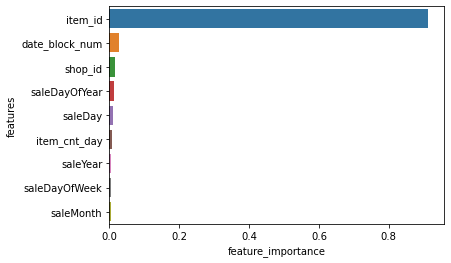

In [56]:
plot_features(X_train.columns, ideal_model.feature_importances_)


In [57]:
sum(ideal_model.feature_importances_)


1.0

In [15]:
# Import datra again but this time parse dates
df = pd.read_csv("data/sales_train.csv", low_memory=False, parse_dates = ["date"])

In [6]:
#Make a copy
df_tmp = df.copy()

In [17]:
df_tmp["saleYear"] = df_tmp.date.dt.year
df_tmp["saleMonth"] = df_tmp.date.dt.month
df_tmp["saleDay"] = df_tmp.date.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.date.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.date.dt.dayofyear

In [18]:
df_tmp.drop("date", axis=1, inplace=True)

In [20]:
%%time
# Let's build a machine learning model
from sklearn.linear_model import LinearRegression

model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(df_tmp.drop("item_price", axis=1), df_tmp["item_price"])

Wall time: 15min 45s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [21]:
model.score(df_tmp.drop("item_price", axis=1), df_tmp.item_price)


0.9965016746111698

In [22]:
df_tmp.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,0,59,22154,999.00,1.0,2013,2,1,4,32
1,0,25,2552,899.00,1.0,2013,3,1,4,60
2,0,25,2552,899.00,-1.0,2013,5,1,2,121
3,0,25,2554,1709.05,1.0,2013,6,1,5,152
4,0,25,2555,1099.00,1.0,2013,1,15,1,15


In [23]:
df_tmp.saleYear.value_counts()


2013    1267562
2014    1055861
2015     612426
Name: saleYear, dtype: int64

In [24]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2015]
df_train = df_tmp[df_tmp.saleYear != 2015]

len(df_val), len(df_train)

(612426, 2323423)

In [25]:
# Split data into X & y
X_train, y_train = df_train.drop("item_price", axis=1), df_train.item_price
X_valid, y_valid = df_val.drop("item_price", axis=1), df_val.item_price

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2323423, 9), (2323423,), (612426, 9), (612426,))

In [26]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [28]:
# Change max samples in RandomForestRegressor
model = LinearRegression(n_jobs=-1)

In [29]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

Wall time: 3.33 s


LinearRegression(n_jobs=-1)

In [30]:
show_scores(model)

{'Training MAE': 686.9049887103778,
 'Valid MAE': 928.4555327531021,
 'Valid RMSLE': 1.3617974392919625,
 'Training R^2': 0.029251630639369974,
 'Valid R^2': 0.014192240636241915}

In [35]:
show_scores(ideal_model)


{'Training MAE': 686.9137565172939,
 'Valid MAE': 935.7671384370798,
 'Valid RMSLE': 1.369207304217277,
 'Training R^2': 0.02921850599607667,
 'Valid R^2': 0.01331927422765844}

In [37]:
# Find feature importance of our best model
ideal_model.feature_names_in_

array(['date_block_num', 'shop_id', 'item_id', 'item_cnt_day', 'saleYear',
       'saleMonth', 'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype=object)

In [38]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

In [41]:
# Import datra again but this time parse dates
df = pd.read_csv("data/sales_train.csv", low_memory=False, parse_dates = ["date"])

In [42]:
#Make a copy
df_tmp = df.copy()

In [43]:
df_tmp["saleYear"] = df_tmp.date.dt.year
df_tmp["saleMonth"] = df_tmp.date.dt.month
df_tmp["saleDay"] = df_tmp.date.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.date.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.date.dt.dayofyear

In [44]:
df_tmp.drop("date", axis=1, inplace=True)

In [58]:
%%time
# Let's build a machine learning model
from sklearn import linear_model

model = linear_model.Ridge(alpha=.5)
model.fit(df_tmp.drop("item_price", axis=1), df_tmp["item_price"])

Wall time: 1.34 s


Ridge(alpha=0.5)

In [59]:
model.score(df_tmp.drop("item_price", axis=1), df_tmp.item_price)


0.028657295231039992

In [48]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2015]
df_train = df_tmp[df_tmp.saleYear != 2015]

len(df_val), len(df_train)

(612426, 2323423)

In [49]:
# Split data into X & y
X_train, y_train = df_train.drop("item_price", axis=1), df_train.item_price
X_valid, y_valid = df_val.drop("item_price", axis=1), df_val.item_price

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((2323423, 9), (2323423,), (612426, 9), (612426,))

In [50]:
# Create evaluation function (the competition uses Root Mean Square Log Error)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

In [51]:
%%time
# Cutting down the max number of samples each tree can see improves training time
model.fit(X_train, y_train)

Wall time: 11min 33s


RandomForestRegressor(n_jobs=-1, random_state=42)